4/4 [==============================] - 0s 1ms/step


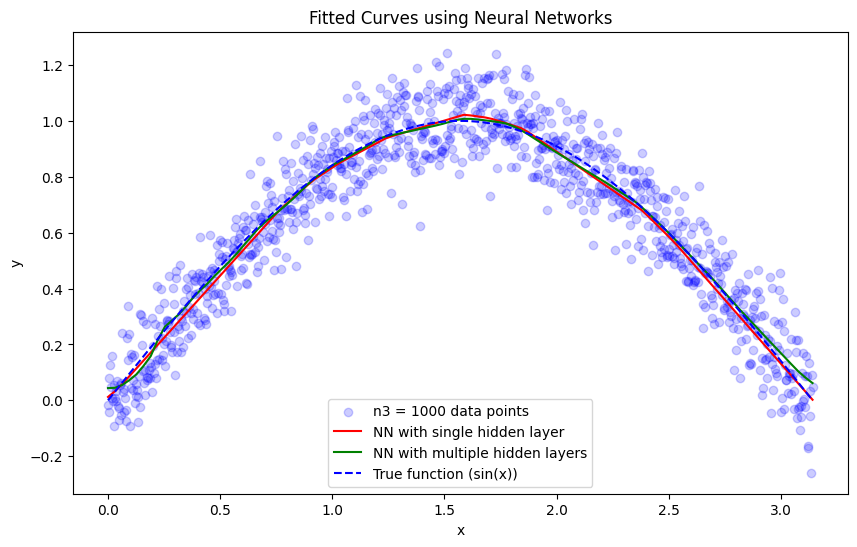

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Simulated dataset with n3 = 1000 points
n3 = 1000
x3 = np.linspace(0, np.pi, n3)
y3 = np.sin(x3) + 0.1 * np.random.normal(0, 1, n3)

# Define the neural network architectures
def build_single_layer_nn():
    model = keras.Sequential([
        keras.layers.Dense(100, activation='relu', input_shape=(1,)),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_multi_layer_nn():
    model = keras.Sequential([
        keras.layers.Dense(100, activation='relu', input_shape=(1,)),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Fit NN models
nn_single_layer = build_single_layer_nn()
nn_multi_layer = build_multi_layer_nn()

# Reshape x3 for training
x3_reshaped = x3.reshape(-1, 1)

# Fit the models
nn_single_layer.fit(x3_reshaped, y3, epochs=200, verbose=0)
nn_multi_layer.fit(x3_reshaped, y3, epochs=200, verbose=0)

# Predictions
x_grid = np.linspace(0, np.pi, 100).reshape(-1, 1)
y_pred_single_layer = nn_single_layer.predict(x_grid)
y_pred_multi_layer = nn_multi_layer.predict(x_grid)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x3, y3, color='blue', alpha=0.2, label=f'n3 = {n3} data points')
plt.plot(x_grid, y_pred_single_layer, color='red', label='NN with single hidden layer')
plt.plot(x_grid, y_pred_multi_layer, color='green', label='NN with multiple hidden layers')
plt.plot(x_grid, np.sin(x_grid), color='blue', linestyle='--', label='True function (sin(x))')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitted Curves using Neural Networks')
plt.show()
